# To Predict the average price of an Avocado:Regression 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#deleting unnamed column
df=df.iloc[:,1:]

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape

(1500, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1500 non-null   object 
 1   AveragePrice  1500 non-null   float64
 2   Total Volume  1500 non-null   float64
 3   4046          1500 non-null   float64
 4   4225          1500 non-null   float64
 5   4770          1500 non-null   float64
 6   Total Bags    1500 non-null   float64
 7   Small Bags    1500 non-null   float64
 8   Large Bags    1500 non-null   float64
 9   XLarge Bags   1500 non-null   float64
 10  type          1500 non-null   object 
 11  year          1500 non-null   int64  
 12  region        1500 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 152.5+ KB


In [7]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [8]:
df["region"].value_counts()

California             74
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
Roanoke                17
DallasFtWorth          17
MiamiFtLauderdale      17
RaleighGreen

In [9]:
df['type'].unique()


array(['conventional'], dtype=object)

as type is having single category..we can drop this column

In [10]:
df.drop('type',axis=1,inplace=True)

In [11]:
#checking null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

In [12]:
#converting date to datetime
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0      2015-12-27
1      2015-12-20
2      2015-12-13
3      2015-06-12
4      2015-11-29
          ...    
1495   2016-02-14
1496   2016-07-02
1497   2016-01-31
1498   2016-01-24
1499   2016-01-17
Name: Date, Length: 1500, dtype: datetime64[ns]

In [13]:
df['month']=df["Date"].dt.month
df['day']=df["Date"].dt.day


In [14]:
df.shape


(1500, 14)

In [15]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
count,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000
mean,1.071533,1.609088e+06,6.506221e+05,6.145873e+05,5.047160e+04,2.934071e+05,2.486180e+05,4.260156e+04,2187.511707,2015.153333,6.334667,15.245333
std,0.185364,4.451398e+06,1.957018e+06,1.679916e+06,1.383050e+05,7.586402e+05,6.481144e+05,1.183651e+05,7482.631600,0.360429,3.466796,8.973972
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.970000,1.476492e+05,2.013010e+04,4.185570e+04,8.672775e+02,3.587820e+04,2.963462e+04,5.125525e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.073439e+05,8.411721e+04,1.243290e+05,7.360670e+03,7.460980e+04,6.301849e+04,4.785235e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.904908e+05,3.811823e+05,4.868930e+05,3.085165e+04,1.582093e+05,1.468208e+05,3.005311e+04,409.167500,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


from above we can say columns having outliers

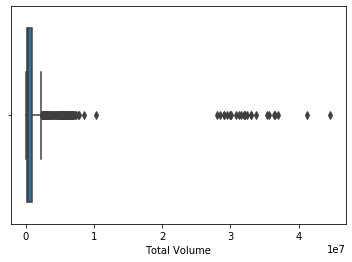

In [16]:
#checking outliers
sns.boxplot(df['Total Volume'])

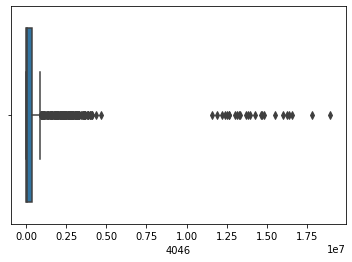

In [17]:
sns.boxplot(df['4046'])

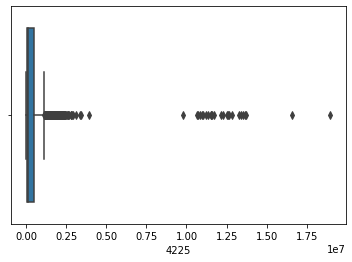

In [18]:
 sns.boxplot(df['4225'])

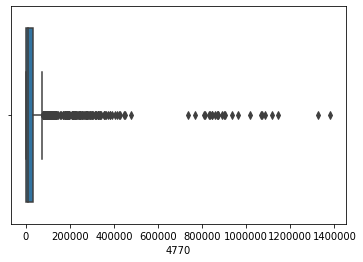

In [19]:
 sns.boxplot(df['4770'])

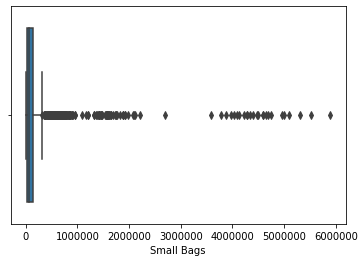

In [20]:
 sns.boxplot(df['Small Bags'])

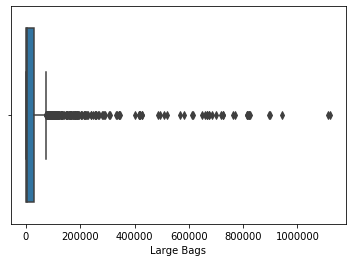

In [21]:
sns.boxplot(df['Large Bags'])

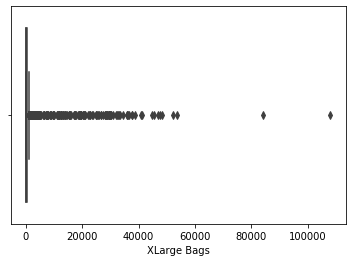

In [22]:
sns.boxplot(df['XLarge Bags'])

In [23]:
#checking correlation
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
AveragePrice,1.000000,-0.134959,-0.187113,-0.085111,-0.095324,-0.103354,-0.089141,-0.171741,-0.041001,0.144857,0.046103,0.085580
Total Volume,-0.134959,1.000000,0.985710,0.987123,0.934243,0.968644,0.961504,0.910698,0.520289,-0.000516,-0.052927,-0.031498
4046,-0.187113,0.985710,1.000000,0.951972,0.898781,0.932237,0.924009,0.885633,0.473206,-0.036681,-0.050792,-0.029545
4225,-0.085111,0.987123,0.951972,1.000000,0.927698,0.952795,0.944905,0.901071,0.503345,-0.003079,-0.055989,-0.040835
4770,-0.095324,0.934243,0.898781,0.927698,1.000000,0.926654,0.923804,0.840125,0.644789,0.031291,-0.053607,-0.017476
Total Bags,-0.103354,0.968644,0.932237,0.952795,0.926654,1.000000,0.997317,0.910532,0.600006,0.092707,-0.045777,-0.014995
Small Bags,-0.089141,0.961504,0.924009,0.944905,0.923804,0.997317,1.000000,0.878042,0.609522,0.109571,-0.047030,-0.010350
Large Bags,-0.171741,0.910698,0.885633,0.901071,0.840125,0.910532,0.878042,1.000000,0.444945,-0.020136,-0.037363,-0.040923
XLarge Bags,-0.041001,0.520289,0.473206,0.503345,0.644789,0.600006,0.609522,0.444945,1.000000,0.227257,0.023415,0.023560
year,0.144857,-0.000516,-0.036681,-0.003079,0.031291,0.092707,0.109571,-0.020136,0.227257,1.000000,-0.032553,0.028581


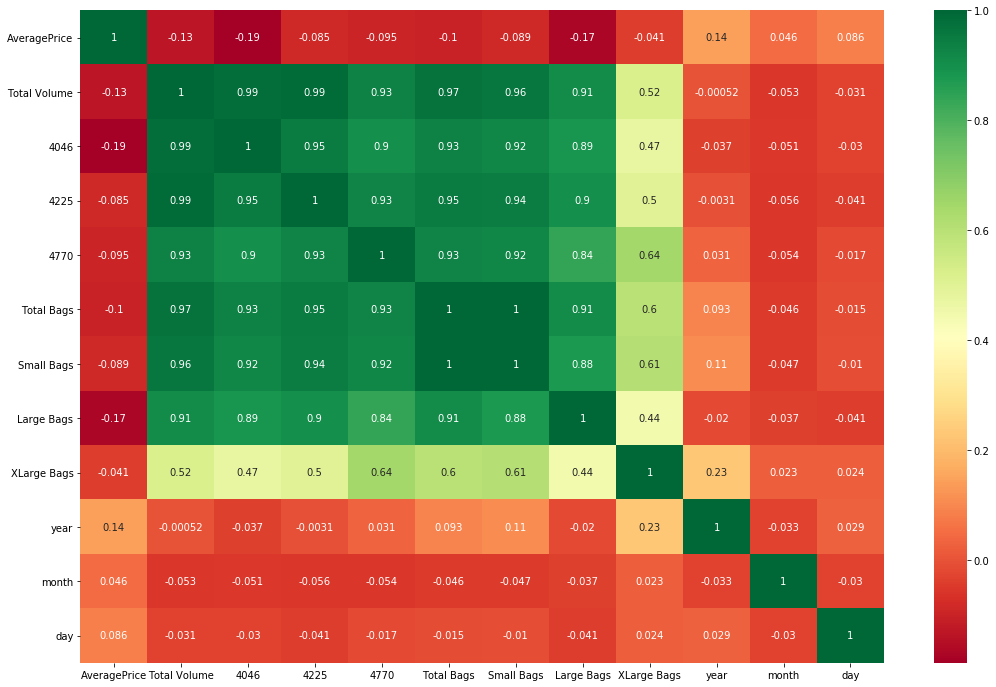

In [24]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn') 

from above we can say only year,month and day are positively correlated with Average Price.
most of the columns are correlated with each other.


Text(0.5, 1.0, 'Average Price')

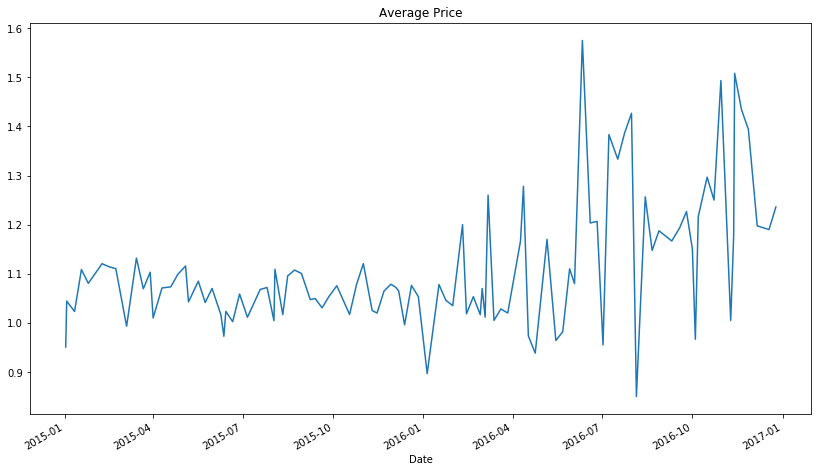

In [25]:
#Visualization
d_group=df.groupby('Date').mean()
plt.figure(figsize=(14,8))
d_group['AveragePrice'].plot(x=df.Date)
plt.title('Average Price')

price is increasing according to dates

Text(0.5, 1.0, 'yearly price in each region')

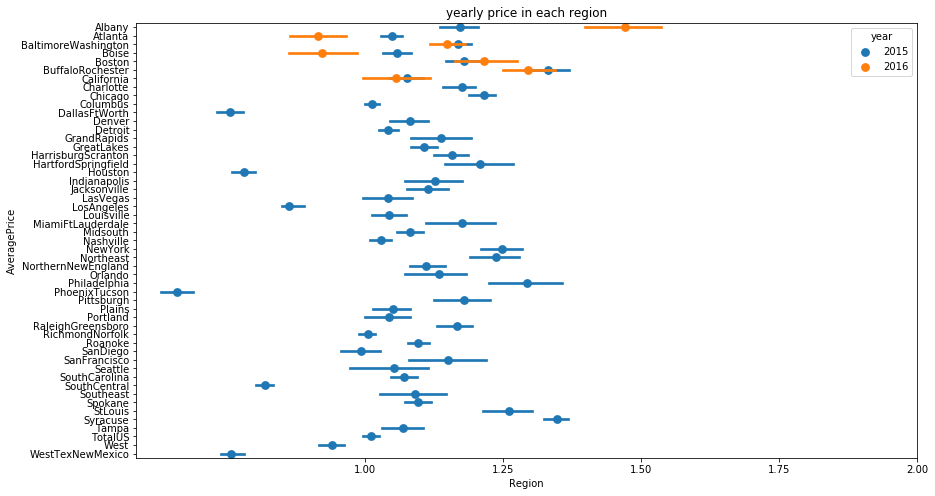

In [26]:
plt.figure(figsize=(14,8))
sns.pointplot(x="AveragePrice",y='region',data=df,hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel("Region")
plt.ylabel("AveragePrice")
plt.title("yearly price in each region")

.....>In 2016 ..only few regions are having higher prices
.....>price changes among states

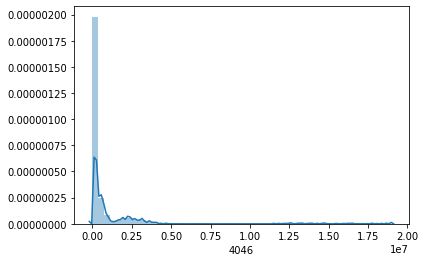

In [27]:
sns.distplot(df["4046"])

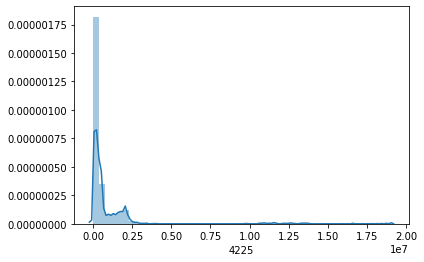

In [28]:
sns.distplot(df["4225"])

from the plots we can say most of the data are not Gaussian distributed

In [29]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [30]:
df.skew()

AveragePrice   -0.168309
Total Volume    6.186663
4046            6.026082
4225            6.379553
4770            5.398791
Total Bags      5.392255
Small Bags      5.379905
Large Bags      5.165092
XLarge Bags     5.770136
year            1.926204
month           0.113279
day             0.043517
dtype: float64

In [31]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region', 'month',
       'day'],
      dtype='object')

In [32]:

#converting categorical into numerical forms using label encoder
list=['region']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in list:
    df[i]=lb.fit_transform(df[i])


In [33]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29


In [34]:
#treating skewness via log meyhod
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [35]:
df.skew()

AveragePrice   -0.168309
Total Volume    0.654462
4046           -0.164883
4225            0.168892
4770           -0.343696
Total Bags      0.683148
Small Bags      0.702207
Large Bags     -0.901512
XLarge Bags     0.781811
year            1.926204
region          0.268156
month           0.113279
day             0.043517
dtype: float64

In [36]:
x=df.iloc[:,1:]
x.shape

(1500, 12)

In [37]:
y=df['AveragePrice'].values
y.shape

(1500,)

In [38]:
#lets split into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
#feature scaling
#standardising the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [40]:
#Linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("r2 score:",r2_score(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.3307255743825439
mean squared error: 0.020538469738235036
RSME: 0.14331248981939793


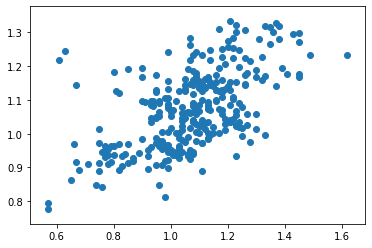

In [41]:
plt.scatter(x=y_test,y=y_pred)

In [42]:
#lasso regression
ls=Lasso(alpha=0.00001)
#alpha is 1.0 default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)


0.40620904703416266

In [43]:
# try to minimize the coefficient variance
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.4062101096522525

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.7628582406561536
mean squared error: 0.007277326999999999
RSME: 0.0853072505710974


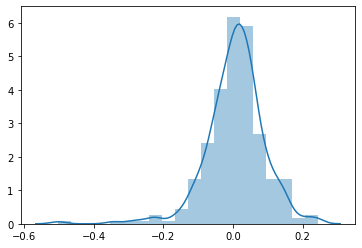

In [45]:
sns.distplot((y_test-y_pred),bins=20)

In [46]:
from sklearn.model_selection import cross_val_score
rfrscores=cross_val_score(rfr,x,y,cv=10)
print(rfrscores)
print(rfrscores.mean(),rfrscores.std())

[-0.67502928  0.40040552  0.22396427  0.16793356 -0.0380607   0.66021878
  0.17994739 -0.02336618  0.32388104  0.31915285]
0.15390472485453668 0.33682430329877755


In [47]:
#Hyperparameter tunning
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [48]:
from sklearn.model_selection import RandomizedSearchCV
#no. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#no. of feature consider at every split
max_features=['auto','sqrt']
# max. no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#Minimum no. of samples required to split a node
min_sample_split=[2,5,10,15,100]
#minimum no. of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [49]:
# create the random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_sample_split,
             'min_samples_leaf':min_samples_leaf
              }

In [50]:
rf_random=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,scoring='r2',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [51]:
rf_random

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [52]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [53]:
predictions=rf_random.predict(x_test)
predictions

array([1.2088    , 1.30374   , 1.18062764, 1.11234   , 0.7907    ,
       0.99334   , 1.01356   , 1.16859   , 1.39143   , 1.01807196,
       1.14348   , 1.1687    , 1.15507   , 1.21546   , 1.0866357 ,
       0.96112   , 0.90844   , 1.07057   , 1.14008889, 1.18881   ,
       1.02106   , 1.11643   , 1.01849   , 0.74474   , 1.34223   ,
       1.16702353, 0.96597   , 1.04989   , 0.93031   , 1.31497   ,
       1.11902   , 1.08952   , 1.39936   , 0.83614   , 1.17516394,
       1.07410846, 1.1777752 , 1.17019653, 1.13058   , 1.07624   ,
       1.09819   , 1.20460714, 1.05434   , 1.07759   , 1.12512556,
       1.00239846, 1.04000667, 0.79498   , 1.04051   , 1.01512   ,
       1.03359821, 1.03198222, 1.28433   , 1.01634909, 1.00602   ,
       1.31641   , 1.17182   , 1.05458   , 1.06691   , 1.02058668,
       1.04493421, 1.12553   , 1.13257391, 1.0075125 , 0.69877   ,
       1.06969   , 0.78566   , 1.12274856, 0.69629   , 1.07824   ,
       0.77974   , 0.951832  , 0.73284   , 1.02354696, 1.13075

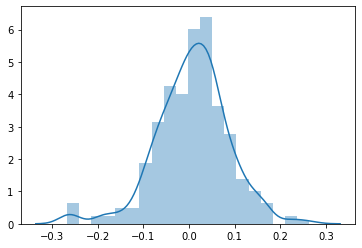

In [54]:
sns.distplot(y_test-predictions)

In [55]:
print("r2 score:",r2_score(y_test,predictions))

r2 score: 0.7894618372785733


In [56]:
df1=pd.DataFrame(predictions)
df1.to_csv("average_price.csv")

In [57]:
#lets save a model
from sklearn.externals import joblib
joblib.dump(rf_random,'average_price.pkl')

['average_price.pkl']

# Avocado : To find region or city :Classification

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [59]:
#loading a dataset
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [60]:
def fast_intro(df):
    print("....summary....")
    print(df.info())
    print("descriptive statistics")
    print(df.describe())
fast_intro(df)

....summary....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1500 non-null   int64  
 1   Date          1500 non-null   object 
 2   AveragePrice  1500 non-null   float64
 3   Total Volume  1500 non-null   float64
 4   4046          1500 non-null   float64
 5   4225          1500 non-null   float64
 6   4770          1500 non-null   float64
 7   Total Bags    1500 non-null   float64
 8   Small Bags    1500 non-null   float64
 9   Large Bags    1500 non-null   float64
 10  XLarge Bags   1500 non-null   float64
 11  type          1500 non-null   object 
 12  year          1500 non-null   int64  
 13  region        1500 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 164.2+ KB
None
descriptive statistics
        Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  1500.000000 

In [61]:
#converting date to datetime
df['Date']=pd.to_datetime(df['Date'])
df['month']=df["Date"].dt.month
df['day']=df["Date"].dt.day


In [62]:
df=df.iloc[:,2:]
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


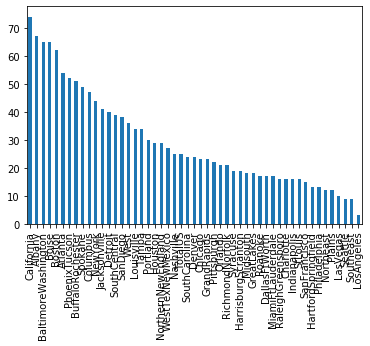

In [63]:
df.region.value_counts().plot(kind="bar")

In [65]:
#converting categorical into numerical forms using label encoder
list=['type','region']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in list:
    df[i]=lb.fit_transform(df[i])


In [66]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


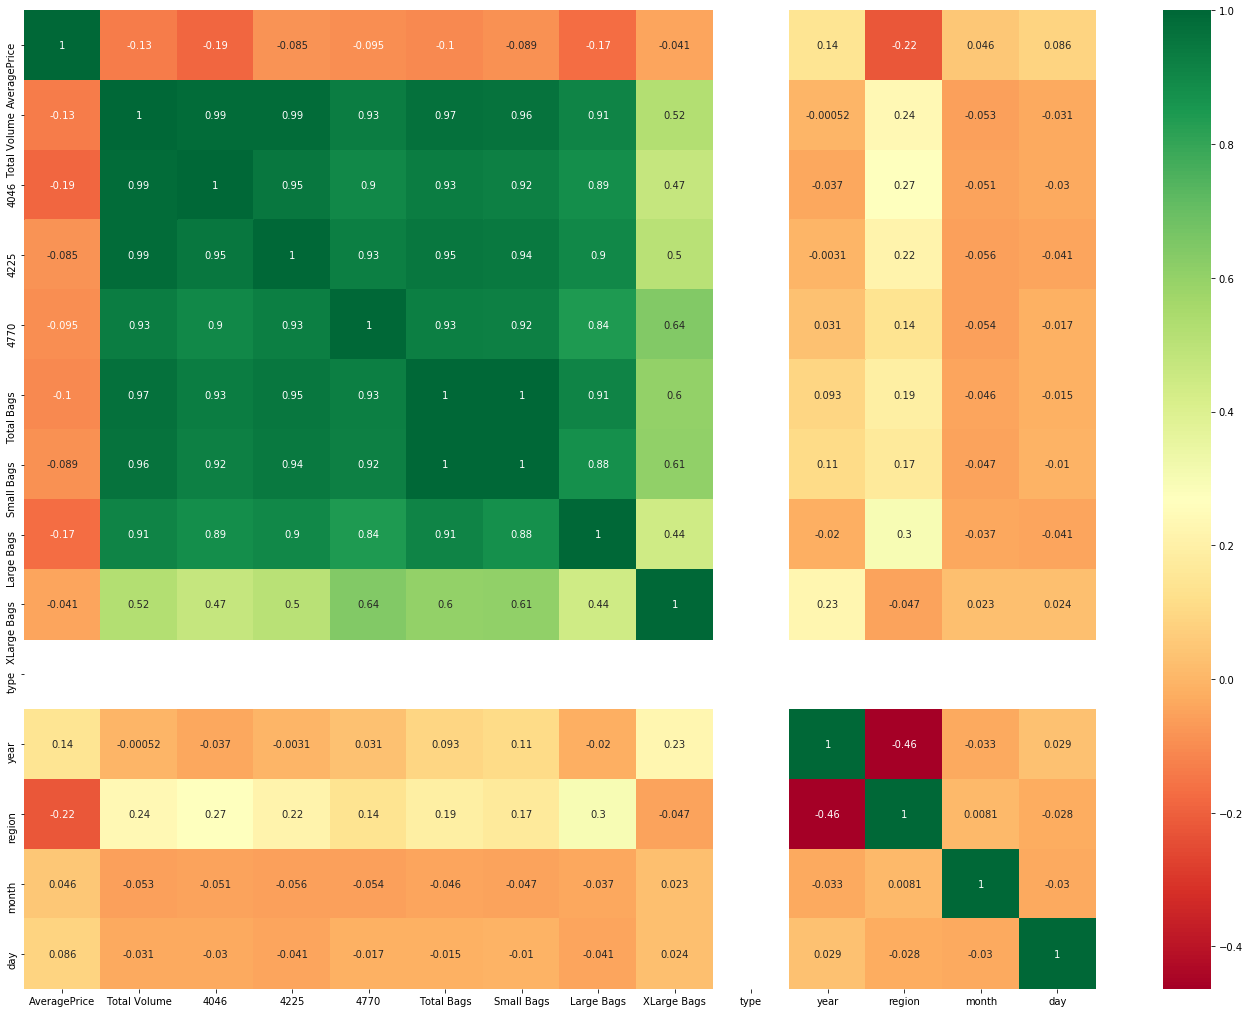

In [67]:
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [68]:
#here we can drop year column
df.drop('year',axis=1,inplace=True)


In [69]:
df.skew()

AveragePrice   -0.168309
Total Volume    6.186663
4046            6.026082
4225            6.379553
4770            5.398791
Total Bags      5.392255
Small Bags      5.379905
Large Bags      5.165092
XLarge Bags     5.770136
type            0.000000
region          0.268156
month           0.113279
day             0.043517
dtype: float64

In [70]:
#treating skewness via log method
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [71]:
df.skew()

AveragePrice   -0.168309
Total Volume    0.654462
4046           -0.164883
4225            0.168892
4770           -0.343696
Total Bags      0.683148
Small Bags      0.702207
Large Bags     -0.901512
XLarge Bags     0.781811
type            0.000000
region          0.268156
month           0.113279
day             0.043517
dtype: float64

In [72]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,11,29


In [73]:
x=df.drop('region',axis=1)
x.shape

(1500, 12)

In [74]:
y=df['region'].values
y.shape

(1500,)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [76]:
model=[KNeighborsClassifier(), DecisionTreeClassifier(),MultinomialNB()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
0.53
[[12  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.38      0.67      0.48        12
           2       0.37      0.83      0.51        12
           3       0.62      0.62      0.62        13
           4       0.45      0.50      0.48        10
           5       0.78      0.70      0.74        10
           6       0.71      1.00      0.83        12
           7       0.25      0.67      0.36         3
           8       0.00      0.00      0.00         7
           9       0.53      1.00      0.69         9
          10       0.67      0.40  

among three..decision tree classifier has more accuracy score. now lets check for random forest

In [77]:
from sklearn.ensemble import RandomForestClassifier   # bagging or parallel ensemble technique
rf=RandomForestClassifier(n_estimators=100,random_state=42)
#RandomForestClassifier(100)....default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.9666666666666667
[[12  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  4]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13
           4       1.00      0.90      0.95        10
           5       0.91      1.00      0.95        10
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         9
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00         3
          14  

In [78]:
rfscores=cross_val_score(rf,x,y,cv=10)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.89333333 0.98       0.92666667 0.97333333 0.92       0.98666667
 1.         0.97333333 0.92       0.93333333]
0.9506666666666668 0.0341499959329752


In [79]:
df1=pd.DataFrame(predrf)
df1.to_csv("region.csv")

In [80]:
#lets save a model
from sklearn.externals import joblib
joblib.dump(rf,'region.pkl')

['region.pkl']